In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/plant-village/PlantVillage/Pepper__bell___Bacterial_spot/0f72db9c-d635-4415-9781-68937328aed2___NREC_B.Spot 9188.JPG
/kaggle/input/plant-village/PlantVillage/Pepper__bell___Bacterial_spot/1b8d3e98-43d9-441d-93ef-a359e6e9ddc2___NREC_B.Spot 9052.JPG
/kaggle/input/plant-village/PlantVillage/Pepper__bell___Bacterial_spot/b6d35d21-4812-4e32-ab9a-b6ddda8cbb79___JR_B.Spot 8972.JPG
/kaggle/input/plant-village/PlantVillage/Pepper__bell___Bacterial_spot/e4e7e5a2-5aa1-4378-833d-9142358c7c9b___JR_B.Spot 9092.JPG
/kaggle/input/plant-village/PlantVillage/Pepper__bell___Bacterial_spot/8b50f2db-cbf2-4758-bea6-a011f0cc1497___JR_B.Spot 3235.JPG
/kaggle/input/plant-village/PlantVillage/Pepper__bell___Bacterial_spot/729b55d7-2a99-4861-910d-3b4e2bbce13a___JR_B.Spot 9036.JPG
/kaggle/input/plant-village/PlantVillage/Pepper__bell___Bacterial_spot/4614ed01-e120-4ae9-8f13-028fa8297873___JR_B.Spot 8985.JPG
/kaggle/input/plant-village/PlantVillage/Pepper__bell___Bacterial_spot/b143a281-5395-4a2a-830

# DATA LOADING AND PREPROCESSING

In [2]:
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [4]:
# Data augmentation
datagen = ImageDataGenerator(
    rescale=1.0/255,
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2
)

In [6]:
# Load data
train_data = datagen.flow_from_directory(
    '/kaggle/input/plant-village/PlantVillage/',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

val_data = datagen.flow_from_directory(
    '/kaggle/input/plant-village/PlantVillage/',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)

Found 16516 images belonging to 15 classes.
Found 4122 images belonging to 15 classes.


# MODEL TRAINING

In [7]:
# Model architecture
base_model = EfficientNetB0(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
x = Flatten()(base_model.output)
x = Dropout(0.5)(x)
x = Dense(128, activation='relu')(x)
output = Dense(train_data.num_classes, activation='softmax')(x)

16705208/16705208 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [8]:
# Model Definition
model = Model(inputs=base_model.input, outputs=output)

In [9]:
# Compile model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [10]:
# Train model
model.fit(train_data, validation_data=val_data, epochs=10)

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


517/517 ━━━━━━━━━━━━━━━━━━━━ 447s 721ms/step - accuracy: 0.7354 - loss: 1.0116 - val_accuracy: 0.1545 - val_loss: 9.3480
Epoch 2/10
517/517 ━━━━━━━━━━━━━━━━━━━━ 222s 424ms/step - accuracy: 0.9222 - loss: 0.2623 - val_accuracy: 0.7965 - val_loss: 1.2295
Epoch 3/10
517/517 ━━━━━━━━━━━━━━━━━━━━ 222s 424ms/step - accuracy: 0.9351 - loss: 0.2502 - val_accuracy: 0.9605 - val_loss: 0.1293
Epoch 4/10
517/517 ━━━━━━━━━━━━━━━━━━━━ 223s 426ms/step - accuracy: 0.9488 - loss: 0.1777 - val_accuracy: 0.9195 - val_loss: 0.2631
Epoch 5/10
517/517 ━━━━━━━━━━━━━━━━━━━━ 222s 425ms/step - accuracy: 0.9487 - loss: 0.1854 - val_accuracy: 0.9386 - val_loss: 0.2204
Epoch 6/10
517/517 ━━━━━━━━━━━━━━━━━━━━ 223s 427ms/step - accuracy: 0.9603 - loss: 0.1377 - val_accuracy: 0.9377 - val_loss: 0.2971
Epoch 7/10
517/517 ━━━━━━━━━━━━━━━━━━━━ 223s 427ms/step - accuracy: 0.9577 - loss: 0.1443 - val_accuracy: 0.9546 - val_loss: 0.1702
Epoch 8/10
517/517 ━━━━━━━━━━━━━━━━━━━━ 223s 427ms/step - accuracy: 0.9660 - loss: 0.11

In [12]:
# Save model
model.save('plant_disease_model.h5')

In [13]:
model.save('plant_disease_model.keras')

In [15]:
from IPython.display import FileLink 
FileLink(r'plant_disease_model.h5')

/kaggle/working/plant_disease_model.h5

In [16]:
from IPython.display import FileLink 
FileLink(r'plant_disease_model.keras')

/kaggle/working/plant_disease_model.keras

# EVALUATION

In [17]:
# Evaluate the model on the validation set
val_loss, val_accuracy = model.evaluate(val_data)

print(f"Validation Loss: {val_loss:.4f}")
print(f"Validation Accuracy: {val_accuracy:.4f}")

129/129 ━━━━━━━━━━━━━━━━━━━━ 43s 334ms/step - accuracy: 0.9590 - loss: 0.1423
Validation Loss: 0.1304
Validation Accuracy: 0.9634


In [ ]:
# import matplotlib.pyplot as plt

# # Assume `history` is the result of model.fit
# history = model.fit(train_data, validation_data=val_data, epochs=10)

# # Plot accuracy
# plt.figure(figsize=(8, 5))
# plt.plot(history.history['accuracy'], label='Training Accuracy')
# plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
# plt.title('Accuracy Over Epochs')
# plt.xlabel('Epochs')
# plt.ylabel('Accuracy')
# plt.legend()
# plt.grid(True)
# plt.show()

In [ ]:
# # Plot loss
# plt.figure(figsize=(8, 5))
# plt.plot(history.history['loss'], label='Training Loss')
# plt.plot(history.history['val_loss'], label='Validation Loss')
# plt.title('Loss Over Epochs')
# plt.xlabel('Epochs')
# plt.ylabel('Loss')
# plt.legend()
# plt.grid(True)
# plt.show()

129/129 ━━━━━━━━━━━━━━━━━━━━ 43s 332ms/step


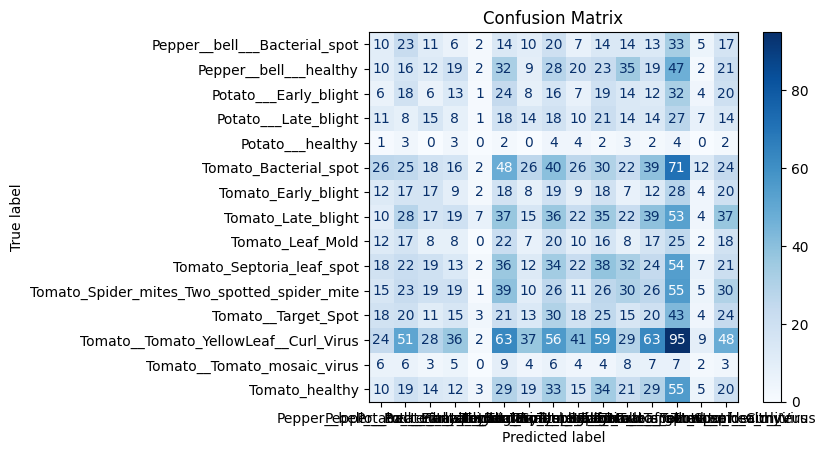

In [19]:
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Generate predictions
val_data.reset()  # Reset the iterator to ensure predictions are in sync
y_pred = model.predict(val_data)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = val_data.classes

# Confusion Matrix
conf_matrix = confusion_matrix(y_true, y_pred_classes)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(conf_matrix, display_labels=list(val_data.class_indices.keys()))
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()


**Sample Predictions**

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


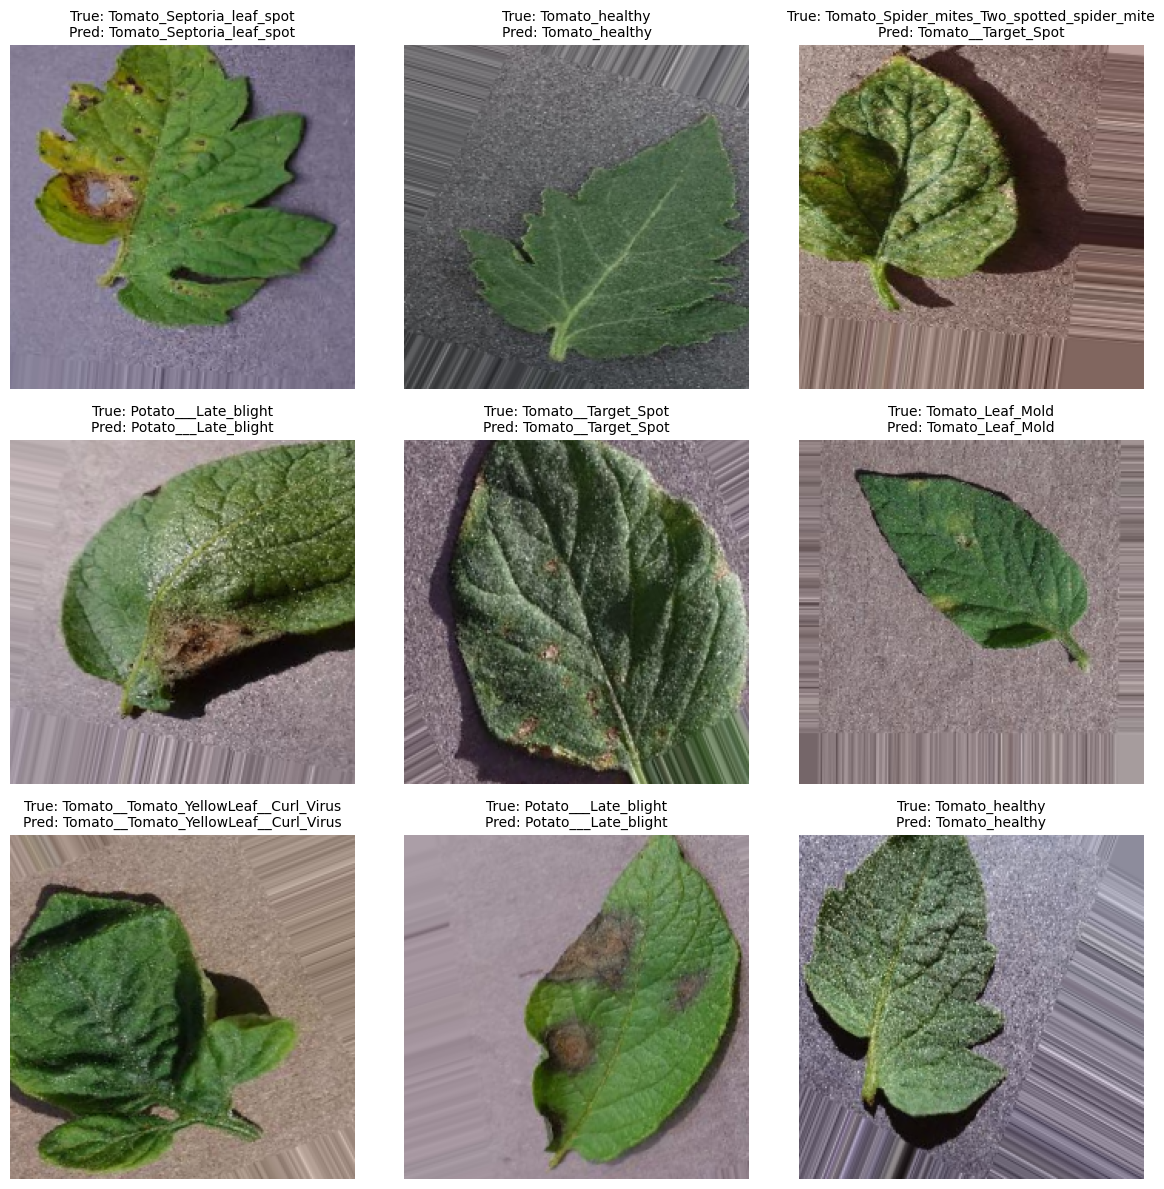

In [25]:
# Get some images and their true labels from the validation set

val_data.reset()
images, labels = next(val_data)

# Predict on the images
predictions = model.predict(images)
predicted_classes = np.argmax(predictions, axis=1)
true_classes = np.argmax(labels, axis=1)

# Convert class indices to a list for subscripting
class_names = list(val_data.class_indices.keys())

# Visualize the images with predictions
plt.figure(figsize=(12, 12))
for i in range(9):  # Display 9 images
    plt.subplot(3, 3, i + 1)
    plt.imshow(images[i])
    true_label = class_names[true_classes[i]]
    predicted_label = class_names[predicted_classes[i]]
    plt.title(f"True: {true_label}\nPred: {predicted_label}", fontsize=10)
    plt.axis('off')
plt.tight_layout()
plt.show()
